In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_letter = pd.read_csv('./Letter Recognition/letter-recognition.csv')

In [4]:
df_letter.shape

(20000, 17)

In [5]:
df_letter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
letter    20000 non-null object
xbox      20000 non-null int64
ybox      20000 non-null int64
width     20000 non-null int64
height    20000 non-null int64
onpix     20000 non-null int64
xbar      20000 non-null int64
ybar      20000 non-null int64
x2bar     20000 non-null int64
y2bar     20000 non-null int64
xybar     20000 non-null int64
x2ybar    20000 non-null int64
xy2bar    20000 non-null int64
xedge     20000 non-null int64
xedgey    20000 non-null int64
yedge     20000 non-null int64
yedgex    20000 non-null int64
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [6]:
print(sorted(df_letter.letter.unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [7]:
df_letter.letter.value_counts()

U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
Q    783
N    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
Z    734
H    734
Name: letter, dtype: int64

In [8]:
df_letter.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [9]:
df_letter.columns

Index(['letter', 'xbox ', 'ybox ', 'width ', 'height', 'onpix ', 'xbar ',
       'ybar ', 'x2bar', 'y2bar ', 'xybar ', 'x2ybar', 'xy2bar', 'xedge ',
       'xedgey', 'yedge ', 'yedgex'],
      dtype='object')

In [10]:
df_letter.columns = df_letter.columns.str.strip()

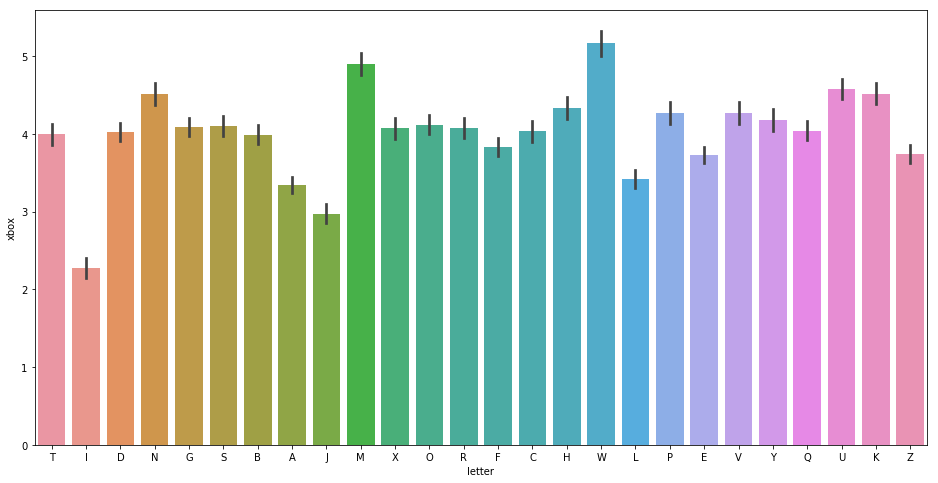

In [11]:
plt.figure(figsize=(16, 8))
sns.barplot(x=df_letter.letter, y=df_letter.xbox, 
            data=df_letter)

In [12]:
letter_mean = df_letter.groupby('letter').mean()

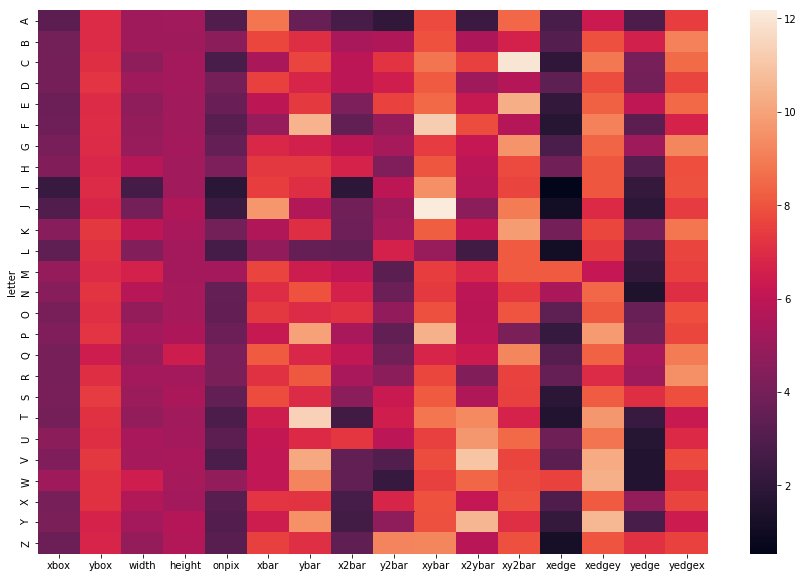

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(letter_mean)

### Data Preparation

In [14]:
# average feature values
round(df_letter.drop('letter', axis=1).mean(), 2)

xbox      4.02
ybox      7.04
width     5.12
height    5.37
onpix     3.51
xbar      6.90
ybar      7.50
x2bar     4.63
y2bar     5.18
xybar     8.28
x2ybar    6.45
xy2bar    7.93
xedge     3.05
xedgey    8.34
yedge     3.69
yedgex    7.80
dtype: float64

mean values are varying across the columns values, better to scale them

In [15]:
from sklearn.preprocessing import scale

In [16]:
X = df_letter.drop(labels=['letter'], axis=1)

In [17]:
y = df_letter['letter']

In [18]:
X = scale(X)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
from sklearn.svm import SVC

In [22]:
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

y_pred = model_linear.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [24]:
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

0.8523333333333334


array([[198,   0,   0,   0,   0,   0,   1,   1,   0,   1,   1,   1,   0,
          0,   0,   0,   0,   1,   0,   1,   1,   0,   0,   0,   3,   0],
       [  0, 188,   0,   3,   0,   1,   3,   3,   1,   0,   1,   0,   0,
          2,   0,   1,   1,   9,   3,   0,   0,   1,   0,   1,   0,   0],
       [  1,   0, 200,   0,   7,   0,  12,   1,   0,   0,   5,   0,   0,
          0,   3,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  1,  15,   0, 210,   0,   1,   2,   2,   1,   0,   1,   0,   1,
          5,   3,   0,   0,   5,   0,   1,   0,   0,   0,   0,   0,   0],
       [  0,   1,   3,   0, 204,   2,   6,   1,   0,   0,   1,   5,   0,
          0,   0,   0,   2,   2,   1,   2,   0,   0,   0,   1,   0,   3],
       [  0,   0,   0,   1,   1, 201,   1,   2,   1,   1,   0,   0,   0,
          2,   0,   2,   0,   0,   3,   7,   1,   0,   1,   0,   1,   0],
       [  0,   1,   9,   4,   2,   2, 167,   1,   0,   1,   4,   3,   1,
          0,   1,   0,   9,   1,   8,   0,   

### Non-Linear models

In [25]:
rbf_model = SVC(kernel='rbf')

rbf_model.fit(X_train, y_train)

y_pred = rbf_model.predict(X_test)

In [26]:
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

0.9383333333333334


array([[205,   0,   0,   1,   0,   0,   0,   0,   0,   1,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0],
       [  0, 205,   0,   3,   1,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   6,   1,   0,   0,   0,   0,   1,   0,   0],
       [  0,   0, 213,   0,   5,   0,   7,   1,   0,   0,   0,   0,   0,
          0,   4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   4,   0, 234,   0,   0,   1,   3,   0,   0,   0,   0,   0,
          3,   1,   0,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 221,   1,   9,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   2],
       [  0,   0,   0,   1,   0, 215,   1,   1,   1,   0,   0,   0,   0,
          1,   0,   1,   0,   0,   1,   3,   0,   0,   0,   0,   0,   0],
       [  0,   0,   3,   4,   1,   1, 202,   0,   0,   0,   0,   1,   1,
          0,   2,   0,   0,   1,   0,   0,   

### Hyper parameter tuning, by means of grid search

In [27]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

In [28]:
folds = KFold(n_splits=5, shuffle=True, random_state=101)

hyper_params = [
    {
        'C':[1,10,100,1000],
        'gamma':[1e-1,1e-2,1e-3,1e-4]
    }
]

In [29]:
model = SVC(kernel='rbf')

In [30]:
model_cv = GridSearchCV(estimator=model, 
                       param_grid=hyper_params,
                       scoring='accuracy',
                       cv=folds,
                       verbose=1,
                       return_train_score=True)

In [31]:
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 27.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'gamma': [0.1, 0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [33]:
cv_results = pd.DataFrame(model_cv.cv_results_)

In [35]:
cv_results

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,6.180337,3.035287,0.948000,0.970446,1,0.1,"{'gamma': 0.1, 'C': 1}",5,0.949643,0.970625,...,0.940000,0.970268,0.952143,0.971518,0.949286,0.968839,1.265339,0.779111,0.004156,0.000904
1,5.821130,3.284730,0.832714,0.844679,1,0.01,"{'gamma': 0.01, 'C': 1}",11,0.826429,0.843929,...,0.828571,0.847679,0.843929,0.843571,0.830000,0.844018,0.244748,0.116616,0.006221,0.001514
2,11.832133,4.079919,0.677214,0.683821,1,0.001,"{'gamma': 0.001, 'C': 1}",14,0.684643,0.682054,...,0.682500,0.687946,0.670000,0.679554,0.676429,0.686429,0.271674,0.069525,0.005622,0.003021
3,22.866468,4.390671,0.217571,0.227982,1,0.0001,"{'gamma': 0.0001, 'C': 1}",16,0.203929,0.212679,...,0.206429,0.228393,0.237500,0.240625,0.232857,0.240625,0.909017,0.191395,0.014490,0.011507
4,4.721582,2.181338,0.969071,0.997482,10,0.1,"{'gamma': 0.1, 'C': 10}",1,0.970357,0.997321,...,0.965714,0.997500,0.967500,0.997321,0.973214,0.997589,0.133591,0.079839,0.002561,0.000143
5,3.496569,2.209329,0.911214,0.929304,10,0.01,"{'gamma': 0.01, 'C': 10}",7,0.914643,0.929643,...,0.902500,0.930357,0.919286,0.928929,0.911071,0.928125,0.197287,0.161996,0.005654,0.000746
6,6.235259,3.519947,0.808929,0.817857,10,0.001,"{'gamma': 0.001, 'C': 10}",12,0.805714,0.818125,...,0.803571,0.819643,0.820714,0.814375,0.805000,0.819464,0.391683,0.184883,0.006227,0.001897
7,12.788418,4.394117,0.677000,0.683643,10,0.0001,"{'gamma': 0.0001, 'C': 10}",15,0.684286,0.681875,...,0.682500,0.687500,0.670000,0.680089,0.677143,0.685446,0.531530,0.158407,0.005788,0.002608
8,5.275955,2.292142,0.967857,1.000000,100,0.1,"{'gamma': 0.1, 'C': 100}",2,0.970000,1.000000,...,0.962857,1.000000,0.965714,1.000000,0.971071,1.000000,0.193500,0.075180,0.003089,0.000000
9,3.831530,1.616791,0.947786,0.978411,100,0.01,"{'gamma': 0.01, 'C': 100}",6,0.948571,0.978482,...,0.941429,0.978393,0.952857,0.978661,0.949286,0.978571,0.043751,0.026065,0.003742,0.000249


In [36]:
cv_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 22 columns):
mean_fit_time         16 non-null float64
mean_score_time       16 non-null float64
mean_test_score       16 non-null float64
mean_train_score      16 non-null float64
param_C               16 non-null object
param_gamma           16 non-null object
params                16 non-null object
rank_test_score       16 non-null int32
split0_test_score     16 non-null float64
split0_train_score    16 non-null float64
split1_test_score     16 non-null float64
split1_train_score    16 non-null float64
split2_test_score     16 non-null float64
split2_train_score    16 non-null float64
split3_test_score     16 non-null float64
split3_train_score    16 non-null float64
split4_test_score     16 non-null float64
split4_train_score    16 non-null float64
std_fit_time          16 non-null float64
std_score_time        16 non-null float64
std_test_score        16 non-null float64
std_train_score     

In [37]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

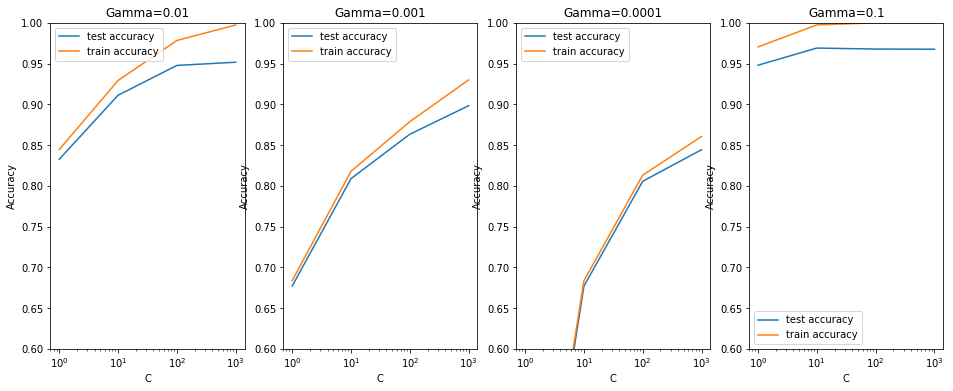

In [40]:
# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(141)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(142)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(143)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(144)
gamma_0001 = cv_results[cv_results['param_gamma']==0.1]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.1")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'])
plt.xscale('log')


In [ ]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

In [41]:
model_cv.best_score_

0.9690714285714286

In [42]:
model_cv.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [43]:
model_cv.best_index_

4

In [44]:
model_cv.best_params_

{'C': 10, 'gamma': 0.1}

In [46]:
# model with optimal hyperparameters

# model
model = SVC(C=1000, gamma=0.01, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", accuracy_score(y_test, y_pred), "\n")
print(confusion_matrix(y_test, y_pred), "\n")



accuracy 0.9596666666666667 

[[206   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
    0   0   0   0   0   0   2   0]
 [  0 211   0   2   1   0   1   0   0   0   0   0   0   0   0   0   0   1
    2   0   0   0   0   0   0   0]
 [  0   0 220   0   3   0   4   1   0   0   0   0   0   0   2   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   3   0 236   0   1   0   1   0   1   0   0   0   2   2   0   0   1
    1   0   0   0   0   0   0   0]
 [  0   0   1   0 225   1   4   0   0   0   0   0   0   0   0   0   0   0
    1   0   0   0   0   0   0   2]
 [  0   0   0   1   0 217   0   0   1   1   0   0   0   1   0   3   0   0
    0   0   0   1   0   0   0   0]
 [  0   0   2   3   1   0 209   0   0   0   0   0   1   0   1   0   0   0
    0   0   0   1   1   0   0   0]
 [  0   1   3   5   0   0   2 195   1   1   2   1   1   0   1   0   3   1
    0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   1   0   0 203   8   0   0   0   0   0   0   1   0
    0   0   0   0   0   

In [47]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.1, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", accuracy_score(y_test, y_pred), "\n")
print(confusion_matrix(y_test, y_pred), "\n")



accuracy 0.9706666666666667 

[[208   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 213   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   3
    0   0   0   1   0   0   0   0]
 [  0   0 225   0   1   0   2   0   0   0   0   0   0   0   2   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0 240   0   0   1   1   0   2   0   0   0   2   1   0   0   1
    0   0   0   0   0   0   0   0]
 [  0   0   3   0 223   1   3   0   0   0   0   0   0   0   0   1   0   0
    1   0   0   0   0   0   0   2]
 [  0   0   0   1   0 217   0   1   1   0   0   0   0   0   0   3   0   0
    0   1   0   1   0   0   0   0]
 [  0   0   2   2   1   0 209   0   0   0   0   0   1   0   1   0   0   0
    0   0   1   1   1   0   0   0]
 [  0   1   2   3   0   0   1 200   0   1   2   0   1   0   1   0   2   2
    0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 205   9   0   0   0   0   0   0   0   0
    0   0   0   0   0   

In [ ]:

>>> clf = svm.SVC(kernel='linear', C=1)
>>> scores = cross_val_score(clf, iris.data, iris.target, cv=5)
>>> scores                                              
array([0.96..., 1.  ..., 0.96..., 0.96..., 1.        ])

In [48]:
from sklearn.model_selection import cross_val_score

In [55]:
clf = SVC(kernel='rbf', C=1000, gamma=0.01)

In [56]:
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

In [57]:
scores

array([0.94871795, 0.9522622 , 0.94609068, 0.95599284, 0.95804948])

In [58]:
from sklearn.model_selection import cross_validate

In [59]:
scores = cross_validate(clf, X_train, y_train, scoring='accuracy', cv=folds, return_train_score=True)

In [60]:
scores

{'fit_time': array([4.0684824 , 4.20368099, 4.26756406, 4.68244767, 4.49547744]),
 'score_time': array([1.43931174, 1.57222271, 1.49053502, 1.53571796, 1.52547622]),
 'test_score': array([0.95357143, 0.94964286, 0.94857143, 0.95285714, 0.95392857]),
 'train_score': array([0.99705357, 0.99776786, 0.99741071, 0.99732143, 0.99723214])}

In [61]:
clf.get_params

<bound method BaseEstimator.get_params of SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)>

In [64]:
model_a1 = cross_validate(estimator=model, 
                       scoring='accuracy',
                          X=X_train,
                          y=y_train,
                       cv=folds,
                       verbose=1,
                       return_train_score=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.3min finished
